<a href="https://colab.research.google.com/github/ansarimaaz05/AI-CODE-EXPLAINER/blob/main/DeepLearningAssigment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8672 - loss: 0.4703 - val_accuracy: 0.9570 - val_loss: 0.1493
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9609 - loss: 0.1308 - val_accuracy: 0.9626 - val_loss: 0.1249
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9738 - loss: 0.0894 - val_accuracy: 0.9715 - val_loss: 0.0972
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9806 - loss: 0.0628 - val_accuracy: 0.9715 - val_loss: 0.0945
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9861 - loss: 0.0450 - val_accuracy: 0.9732 - val_loss: 0.0918
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9899 - loss: 0.0346 - val_accuracy: 0.9760 - val_loss: 0.0821
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9927 - loss: 0.0257 - val_accuracy: 0.9752 - val_loss: 0.0892
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9947 - loss: 0.0197

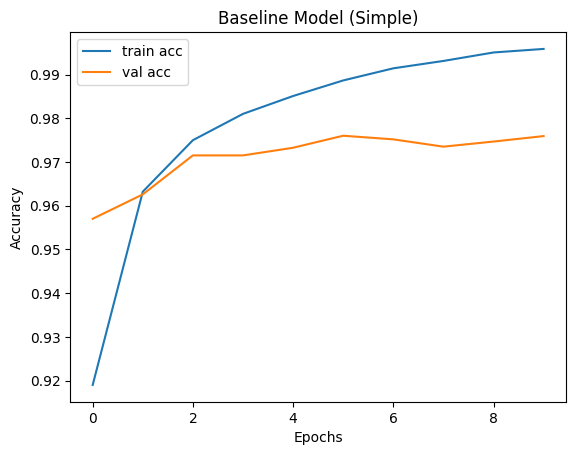

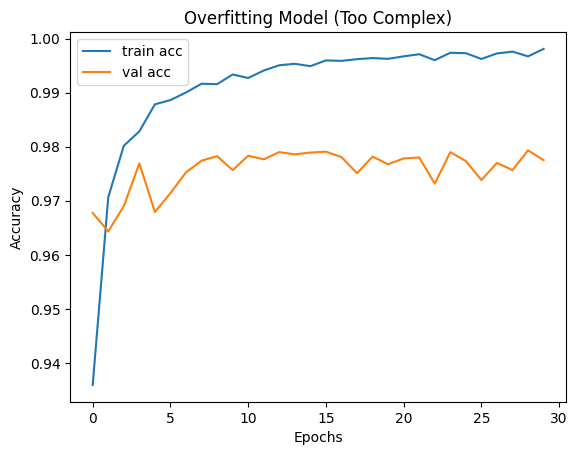

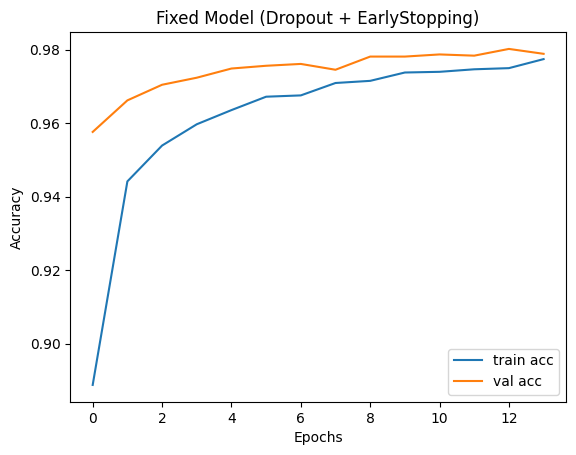

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9726 - loss: 0.1058
Baseline Model Test Accuracy: 0.9772999882698059
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9729 - loss: 0.1882
Overfit Model Test Accuracy: 0.9779999852180481
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9714 - loss: 0.0902
Fixed Model Test Accuracy: 0.9757999777793884


In [1]:
# Task 2: Fighting Overfitting - Making Your Model Generalize Better
# ================================================================

import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten input for simple dense model
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

# ---------------------------------------------------
# 1. Simple Neural Network (Baseline Model)
# ---------------------------------------------------
baseline_model = models.Sequential([
    layers.Dense(128, activation="relu", input_shape=(784,)),
    layers.Dense(10, activation="softmax")
])

baseline_model.compile(optimizer="adam",
                       loss="sparse_categorical_crossentropy",
                       metrics=["accuracy"])

history_baseline = baseline_model.fit(
    x_train, y_train,
    epochs=10,
    validation_split=0.2,
    verbose=1
)

# ---------------------------------------------------
# 2. Overfitting Model (Too complex + many epochs)
# ---------------------------------------------------
overfit_model = models.Sequential([
    layers.Dense(512, activation="relu", input_shape=(784,)),
    layers.Dense(512, activation="relu"),
    layers.Dense(256, activation="relu"),
    layers.Dense(10, activation="softmax")
])

overfit_model.compile(optimizer="adam",
                      loss="sparse_categorical_crossentropy",
                      metrics=["accuracy"])

history_overfit = overfit_model.fit(
    x_train, y_train,
    epochs=30,  # too many epochs
    validation_split=0.2,
    verbose=1
)

# ---------------------------------------------------
# 3. Fixing Overfitting (Dropout + EarlyStopping)
# ---------------------------------------------------
fix_model = models.Sequential([
    layers.Dense(512, activation="relu", input_shape=(784,)),
    layers.Dropout(0.5),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax")
])

fix_model.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=3, restore_best_weights=True
)

history_fix = fix_model.fit(
    x_train, y_train,
    epochs=30,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# ---------------------------------------------------
# 4. Plot Training vs Validation
# ---------------------------------------------------
def plot_history(history, title):
    plt.plot(history.history["accuracy"], label="train acc")
    plt.plot(history.history["val_accuracy"], label="val acc")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

plot_history(history_baseline, "Baseline Model (Simple)")
plot_history(history_overfit, "Overfitting Model (Too Complex)")
plot_history(history_fix, "Fixed Model (Dropout + EarlyStopping)")

# ---------------------------------------------------
# 5. Final Evaluation
# ---------------------------------------------------
print("Baseline Model Test Accuracy:", baseline_model.evaluate(x_test, y_test)[1])
print("Overfit Model Test Accuracy:", overfit_model.evaluate(x_test, y_test)[1])
print("Fixed Model Test Accuracy:", fix_model.evaluate(x_test, y_test)[1])

